<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [ ]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [ ]:
prod_df = pd.read_csv('/content/drive/MyDrive/GL- AIML/Stats NLP/product_data.csv')
print('Dataset Shape : ',prod_df.shape)
prod_df.sample(5)

Dataset Shape :  (720, 10)


,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
125,B01CJ3SF02,Samsung,"Samsung Galaxy GS7 Edge, Gold 32GB (Verizon Wi...",https://www.amazon.com/Samsung-Galaxy-GS7-Edge...,https://m.media-amazon.com/images/I/51dtq9MFg0...,3.8000000,https://www.amazon.com/product-reviews/B01CJ3SF02,37,0.0000000,0.0000000
55,B00F9RRVUG,Samsung,Samsung a157V (AT&T Go Phone) No Annual Contract,https://www.amazon.com/Samsung-a157V-Phone-Ann...,https://m.media-amazon.com/images/I/415nK4G4hJ...,3.5000000,https://www.amazon.com/product-reviews/B00F9RRVUG,299,102.0000000,0.0000000
284,B0757LYR7P,Samsung,Samsung Galaxy S8 SM-G950UZSAVZW - Verizon - C...,https://www.amazon.com/Samsung-Galaxy-SM-G950U...,https://m.media-amazon.com/images/I/311DkyHrY8...,5.0000000,https://www.amazon.com/product-reviews/B0757LYR7P,2,289.9500000,0.0000000
433,B07GPNGWNK,Xiaomi,"Xiaomi Mi 8, 6-64GB, Unlocked, Global Version ...",https://www.amazon.com/Xiaomi-6-64GB-Unlocked-...,https://m.media-amazon.com/images/I/61ITfSJQDA...,4.5000000,https://www.amazon.com/product-reviews/B07GPNGWNK,60,268.9900000,0.0000000
173,B01M0PADR4,Google,Google Pixel XL G2PW210032GBBK Factory Unlocke...,https://www.amazon.com/Google-G2PW210032GBBK-U...,https://m.media-amazon.com/images/I/71PZz7CQ9U...,3.4000000,https://www.amazon.com/product-reviews/B01M0PADR4,429,201.4800000,0.0000000


In [ ]:
review_df = pd.read_csv('/content/drive/MyDrive/GL- AIML/Stats NLP/reviews.csv')
print('Dataset Shape : ',review_df.shape)
review_df.sample(5)

Dataset Shape :  (67986, 8)


,asin,name,rating,date,verified,title,body,helpfulVotes
13934,B00O2ALRNS,Mary Clements,5,"March 8, 2015",True,Five Stars,Excellent phone received it within 3 days afte...,1.0000000
42972,B077V219SV,Corbin Carter,5,"July 8, 2019",True,great S7,great phone,nan
24804,B01I8V0MJQ,Glenn Turner,1,"March 3, 2017",True,Not like new,"Just got the phone today, was not wrapped like...",12.0000000
36656,B072B7XSVT,Queeny,5,"July 30, 2019",True,Great phone.,"Love this phone, was a gift for my hubby. He l...",nan
49276,B07FM9913M,Traveling Tech Guy,2,"October 17, 2019",True,Very good phone - if you get a working one,"For a full review of the phone itself, scroll ...",nan


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [ ]:
prod_df.columns

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

In [ ]:
prod_df.drop(columns=['url','image','reviewUrl'],inplace=True)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [ ]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   rating         720 non-null    float64
 4   totalReviews   720 non-null    int64  
 5   price          720 non-null    float64
 6   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 39.5+ KB


- There are 2 columns which are float or int. All others are float.
- There are only 4 null values in brand column, all other have no null value.

In [ ]:
|prod_df.describe()

,rating,totalReviews,price,originalPrice
count,720.0000000,720.0000000,720.0000000,720.0000000
mean,3.7137500,105.6791667,234.9489306,63.6907778
std,0.7160138,167.6011014,200.0084407,172.4053696
min,1.0000000,1.0000000,0.0000000,0.0000000
25%,3.3000000,7.0000000,97.5125000,0.0000000
50%,3.8000000,32.0000000,188.9750000,0.0000000
75%,4.1000000,122.2500000,336.7250000,0.0000000
max,5.0000000,983.0000000,999.9900000,999.9900000


- In Rating column, we have values ranging from 1 to 5 with mean of 3.72 and deviation of 0.72.
- In totalReviews column, we have values ranging from 1 to 983 with mean of 105.68 and deviation of 167.60.
- In price column, we have values ranging from 0 to 999.99 with mean of 234.95 and deviation of 200.09.
- In originalPrice column, we have values ranging from 0 to 999.99 with mean of 63.7 and deviation of 172.4.

In [ ]:
prod_df.describe(include='O')

,asin,brand,title
count,720,716,720
unique,720,10,718
top,B077MR13HM,Samsung,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...
freq,1,346,2


- There are 718 unique values in brand column.
- Samsung have topmost rows with 346 rowcount.

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [ ]:
review_df.describe()

,rating,helpfulVotes
count,67986.0000000,27215.0000000
mean,3.8079163,8.2296895
std,1.5829058,31.9548772
min,1.0000000,1.0000000
25%,3.0000000,1.0000000
50%,5.0000000,2.0000000
75%,5.0000000,5.0000000
max,5.0000000,990.0000000


In [ ]:
review_df.describe(include='O')

,asin,name,date,title,body
count,67986,67984,67986,67972,67965
unique,720,47323,2983,41489,59811
top,B00F2SKPIM,Amazon Customer,"December 11, 2019",Five Stars,Good
freq,981,6507,234,6043,303


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

- Top brand is Samsung.
- There are no duplicate asin id.
- Top title is Apple iphone 6s
- Rating ranges from 1 to 5. Mean rating is 3.71
- Price ranges from 0 to 999.99 with 235 as mean price value

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

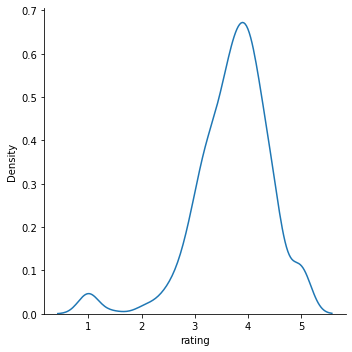

In [ ]:
sns.displot(data= prod_df,x='rating',kind ='kde')

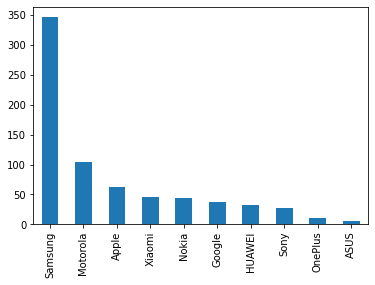

In [ ]:
prod_df['brand'].value_counts().plot(kind='bar')

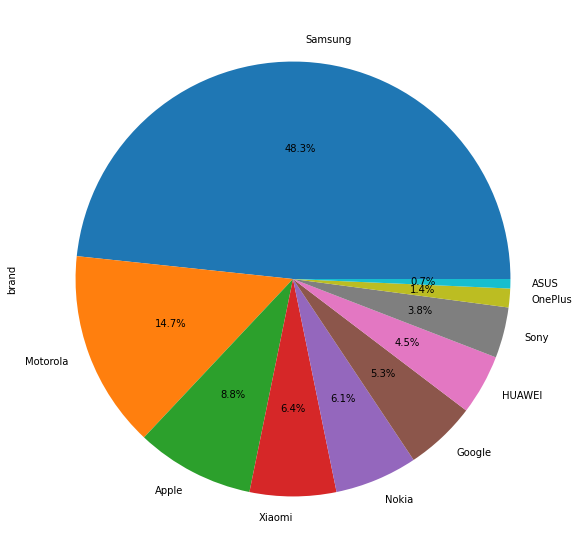

In [ ]:
prod_df['brand'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(14,10))

### 4.5 Display average rating per brand

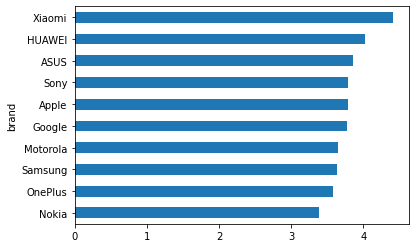

In [ ]:
prod_df.groupby(by='brand')['rating'].mean().sort_values().plot(kind='barh')

### 4.6 Display average price per brand

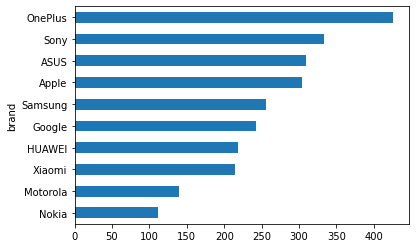

In [ ]:
prod_df.groupby(by='brand')['price'].mean().sort_values().plot(kind='barh')

### 4.7 Display average 'totalReviews' per brand

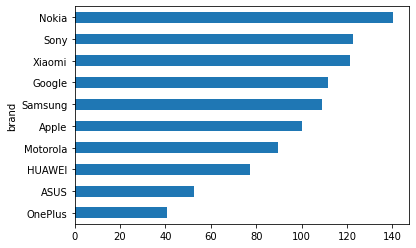

In [ ]:
prod_df.groupby(by='brand')['totalReviews'].mean().sort_values().plot(kind='barh')

In [ ]:
print('Product Dataset Shape: \n',prod_df.shape)
print('\nReviews Dataset Shape: \n',review_df.shape)

Product Dataset Shape: 
 (720, 7)

Reviews Dataset Shape: 
 (67986, 8)


### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [ ]:
new_df = pd.merge(review_df ,prod_df ,how='left' ,on='asin')
print('\nNew Merge Dataset Shape: \n',new_df.shape)


New Merge Dataset Shape: 
 (67986, 14)


In [ ]:
new_df.sample(2)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
332,B002UHS0UI,David,5,"August 10, 2014",False,Most durable long last phone ever,I bought this phone for my great aunt because ...,1.0000000,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,2.7000000,208,0.0000000,0.0000000
31773,B06XRJQX91,Greg J.,3,"June 24, 2019",True,Good condition,Worked well for several weeks but the touch sc...,nan,Apple,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",3.6000000,427,158.8800000,271.8400000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [ ]:
new_df.rename(columns={"rating_x": "user_rating", "title_x": "review_title","title_y": "item_title","rating_y":"overall_rating"},inplace=True)
new_df.sample(2)

,asin,name,user_rating,date,verified,review_title,body,helpfulVotes,brand,item_title,overall_rating,totalReviews,price,originalPrice
28478,B01N4E0RF1,AmyK1967,5,"December 16, 2019",True,Great phone,Love this phone...will never buy phones anywhe...,nan,Samsung,Samsung Galaxy S7 - Black - 32GB - Verizon (Re...,3.8000000,600,148.9600000,0.0000000
38353,B0751KLN39,Dhanpaul Oodith,5,"October 2, 2019",False,Works perfectly! 👌,Quick delivery and the phone works perfectly!,nan,Motorola,Motorola Moto Z2 Play XT1710-06 - 64GB Single ...,3.9000000,11,195.0000000,0.0000000


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [ ]:
new_df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [ ]:
df = new_df[new_df.verified == True]
df.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

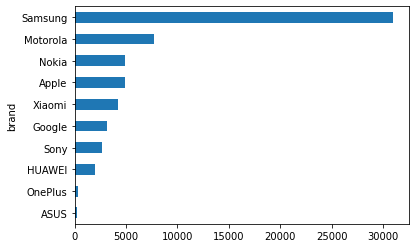

In [ ]:
df.groupby(by='brand')['totalReviews'].count().sort_values().plot(kind='barh')

#### Samsung have highest reviews.

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [ ]:
final_df = df[['brand','body','price','user_rating','review_title']]
final_df.sample(3)

,brand,body,price,user_rating,review_title
350,Motorola,"I like these phones. They are ruggedly built, ...",139.9900000,2,Buyer beware !!!
37836,Apple,Do not buy this iphone. IT IS ONLY GSM COMPATI...,199.9500000,1,DO NOT BUY THIS PHONE
65118,Samsung,Good phone,274.9900000,5,Nice phone at a reasonable price


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

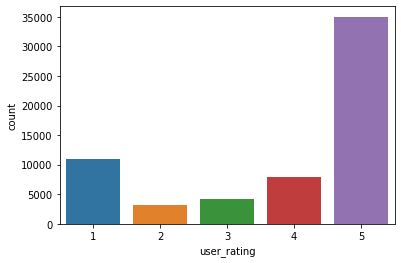

In [ ]:
sns.countplot(final_df['user_rating'])

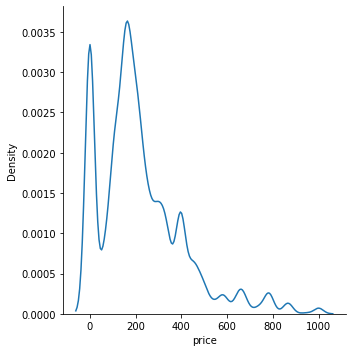

In [ ]:
sns.displot(data= final_df,x='price',kind ='kde')

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (negative) if the user_Rating <= 3

In [ ]:
final_df['sentiment'] = final_df['user_rating'].apply(lambda x:1 if x>3 else 0)

### 4.15 Check frequency distribution of the 'sentiment'

1    42939
0    18286
Name: sentiment, dtype: int64


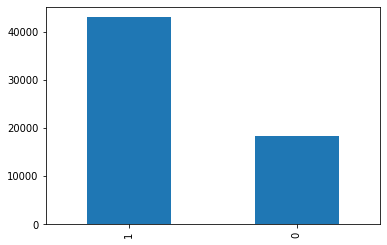

In [ ]:
print(final_df['sentiment'].value_counts())
final_df['sentiment'].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

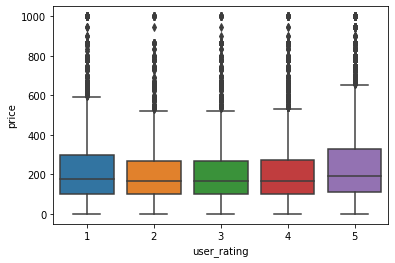

In [ ]:
sns.boxplot(x=final_df['user_rating'],y=final_df['price'])

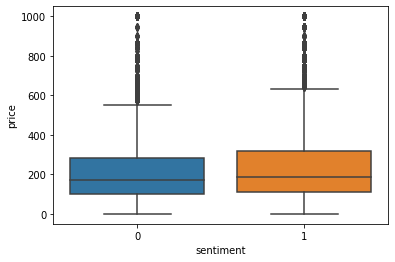

In [ ]:
sns.boxplot(x=final_df['sentiment'],y=final_df['price'])

In [ ]:
pd.crosstab(final_df['brand'],final_df['sentiment']).apply(lambda y : y/y.sum(),axis=1)

sentiment,0,1
brand,,
ASUS,0.3349515,0.6650485
Apple,0.3336751,0.6663249
Google,0.3196333,0.6803667
HUAWEI,0.1812779,0.8187221
Motorola,0.2877884,0.7122116
Nokia,0.3903239,0.6096761
OnePlus,0.1480263,0.8519737
Samsung,0.3062218,0.6937782
Sony,0.3266444,0.6733556


- For both sentiments, price range does not vary too much.
- All the brands have majority data for sentiment = 1 (i.e 4-5 rating).
- For ASUS, Apple, Google : data for sentiment = 0 is 1/3 and for sentiment = 1 is 2/3.

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will peform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         61078 non-null  object 
 1   body          61207 non-null  object 
 2   price         61225 non-null  float64
 3   user_rating   61225 non-null  int64  
 4   review_title  61211 non-null  object 
 5   sentiment     61225 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 5.8+ MB


### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [ ]:
final_df['keyword'] = final_df['body'].str.lower()
final_df['keyword'] = final_df['keyword'].astype('str')
final_df[['keyword','body']].sample(5)

,keyword,body
62189,don't know this was the international version....,Don't know this was the international version....
29419,"great deal!! great phone,","Great deal!! Great phone,"
24085,okay first let me say for the price this is a ...,Okay first let me say for the price this is a ...
35937,i ordered this phone from july 2018 and still ...,I ordered this phone from July 2018 and still ...
4793,i bought this phone for my son (who decided to...,i bought this phone for my son (who decided to...


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [ ]:
final_df['keyword'] = final_df['keyword'].str.replace('[^\w\s]','')
final_df[['keyword','body']].sample(5)

,keyword,body
56902,top of page clearly states compatible with boo...,Top of page clearly states compatible with boo...
11284,it was what i expected,It was what I expected
19628,battery life is bad abd speaker is breakingup ...,battery life is bad abd speaker is breakingup ...
55704,compared to my 6 its different took some time ...,"Compared to my 6, it’s different. Took some ti..."
60685,i have a huawei mate 9 it works good still but...,I have a HUAWEI Mate 9 it works good still but...


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
final_df['keyword'] = final_df['keyword'].apply(lambda words: ' '.join(w for w in words.split() if w not in stop_words))
final_df['keyword'].sample(5)

38874    tablet branded show photo item charger also de...
33873    waited couple months leave review never know p...
20829    great product phone runs 100 times faster old ...
50825    phone keeps loosing connection sim cards multi...
20492    great phone great price refurbished looks bran...
Name: keyword, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
def lemm_text(text):
  return[lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [ ]:
final_df['lemm'] = final_df['keyword'].apply(lemm_text)
final_df['lemm'].head()

14                                 [dont, buy, service]
17    [1, star, phone, locked, pay, additional, fee,...
18    [product, good, used, cell, phone, one, projec...
21    [bought, phone, replace, lg, phone, didnt, lik...
22    [purchased, phone, att, phone, replacement, ev...
Name: lemm, dtype: object

### 5.5 Check most common and rare words in the processed text
- We can also write a function to check word frequency of the text (Optional)

In [ ]:
from collections import Counter
cnt = Counter()
for text in final_df["keyword"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('phone', 74458),
 ('great', 16986),
 ('good', 13415),
 ('battery', 11641),
 ('screen', 10377),
 ('like', 10360),
 ('one', 10035),
 ('new', 9498),
 ('use', 8755),
 ('get', 7566)]

In [ ]:
rare_words = 10
cnt.most_common()[:-rare_words-1:-1]

[('prontoen', 1),
 ('500500', 1),
 ('sd730g', 1),
 ('nois', 1),
 ('tomuch', 1),
 ('instructivo', 1),
 ('confirmen', 1),
 ('intrligente', 1),
 ('haxe', 1),
 ('4ever', 1)]

### 5.6 Initialize tf-idf vectorizer and transform the preprocessed body text

In [ ]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

In [ ]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(2,2))

In [ ]:
tfidf = tfidf_vectorizer.fit_transform(final_df["keyword"])

In [ ]:
final_df.sample(2)

,brand,body,price,user_rating,review_title,sentiment,keyword,lemm
18505,Samsung,Good!,148.9800000,5,Five Stars,1,good,[good]
12254,Samsung,bad phone cut out all time. Dropped call - sen...,0.0000000,1,One Star,0,bad phone cut time dropped call sent back woul...,"[bad, phone, cut, time, dropped, call, sent, b..."


### 5.7 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [ ]:
y = final_df['sentiment']

### 5.9 Split the data into Train & Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(tfidf, y, random_state = 50, stratify=y, test_size=0.3)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y1_train)
print(rf_clf1.score(X_train, y1_train))
print(rf_clf1.score(X_test, y1_test))

0.9958699862332875
0.8881206445993032


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = rf_clf1.predict(X_train)
confusion_matrix(y1_train, y_pred)

array([[12637,   163],
       [   14, 30043]])

## 7. Write your conclusion

In [ ]:
from sklearn.metrics import confusion_matrix
y1_pred = rf_clf1.predict(X_test)
confusion_matrix(y1_test, y1_pred)

array([[ 4055,  1431],
       [  624, 12258]])

##. 8. Further Explore
### 8.0 Merge all independent features and the below text preprocessing steps
### 8.1 Check rare words and drop them
### 8.2 Remove emoticon/emojis
### 8.3 Try different vectorizer for vectorization
### 8.4 Use embeddings
### 8.5 Use NN based models